# Understanding Descriptive Statistics

Import the necessary libraries here:

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [9]:
def dice_roll(n):
    return np.random.randint(1, 6, n)

tosses = pd.DataFrame(dice_roll(10), index=list(range(1,11)), columns=['Toss'])
tosses

,Toss
1,1
2,4
3,4
4,1
5,4
6,2
7,5
8,4
9,3
10,3


#### 2.- Plot the results sorted by value.

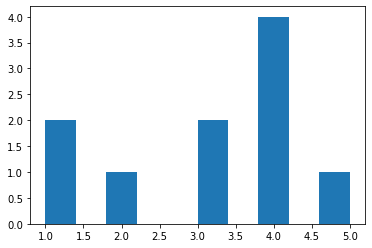

In [10]:
tosses = tosses.sort_values('Toss')
plt.hist(tosses['Toss'])
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

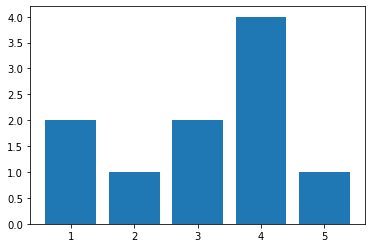

In [11]:
counts = tosses['Toss'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [12]:
"""
The histogram shows missing values too compared to the bar graph.
"""

'\nThe histogram shows missing values too compared to the bar graph.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [13]:
def average(data):
    return np.sum(data) / len(data)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [14]:
average(counts)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [15]:
def median(data):
    data = sorted(data)
    if len(data) % 2 == 0:
        return (data[int(len(data)/2 - 1)] + data[int(len(data)/2)]) / 2
    else:
        return data[int((len(data)/2)-0.5)]
    
print(sorted(tosses['Toss']))    
print(median(tosses['Toss']))

[1, 1, 2, 3, 3, 4, 4, 4, 4, 5]
3.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [16]:
def quartiles(data):
    data = sorted(data)
    if len(data) % 2 == 0:
        return [median(data[:int(len(data)/2)]), median(data), median(data[int(len(data)/2):])]
    else:
        return [median(data[:int(len(data)/2-0.5)]), median(data), median(data[int(len(data)/2+0.5):])]
    
print(quartiles(tosses['Toss']))

[2, 3.5, 4]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

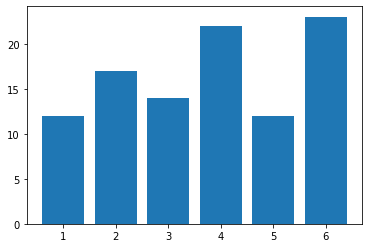

In [17]:
df = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col=0)
df = df.sort_values('value')
counts = df['value'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [18]:
"""
The distribution is kinda uniform: not particularly skewed nor normal.
"""

'\nThe distribution is kinda uniform: not particularly skewed nor normal.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [19]:
average(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [20]:
counts.sort_index()

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

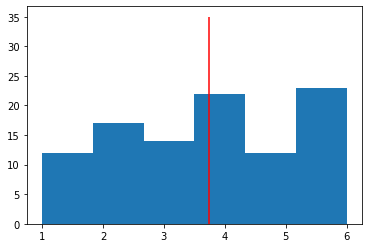

In [21]:
plt.hist(df['value'], 6)
plt.vlines(average(df['value']), 0, 35, 'r')
plt.show()

In [22]:
"""
The mean is centered to the distribution, as expected.
"""

'\nThe mean is centered to the distribution, as expected.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

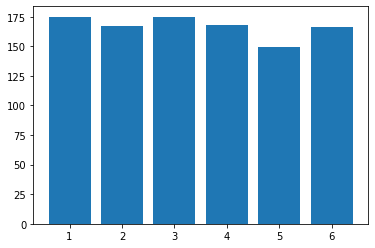

In [23]:
df = pd.read_csv('../data/roll_the_dice_thousand.csv', index_col=0)
df = df.sort_values('value')
counts = df['value'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [24]:
"""
With more tosses we can see how the distribution appears more uniformed than before.
"""

'\nWith more tosses we can see how the distribution appears more uniformed than before.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

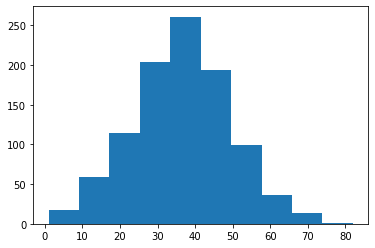

In [25]:
df1 = pd.read_csv('../data/ages_population.csv')
plt.hist(df1['observation'])
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [26]:
print(average(df1['observation']))
print(np.std(df1['observation']))

36.56
12.810089773299795


In [27]:
"""
Yes! Since the distribution is normal, it was easy to make a rough prediction.
"""

'\nYes! Since the distribution is normal, it was easy to make a rough prediction.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

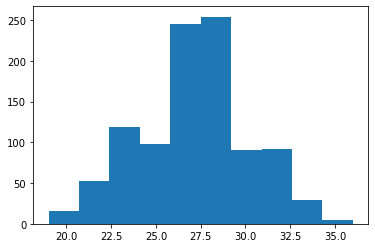

In [28]:
df2 = pd.read_csv('../data/ages_population2.csv')
plt.hist(df2['observation'])
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [29]:
"""
It appears the distribution has a narrower tail, probably meaning that the standard deviation is smaller than the previous distribution.
"""

'\nIt appears the distribution has a narrower tail, probably meaning that the standard deviation is smaller than the previous distribution.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [30]:
print(average(df2['observation']))
print(np.std(df2['observation']))

27.155
2.9683286543103677


In [31]:
"""
The position of the mean still remains central, however the standard deviation appears definitely different from before. It appears that kurtosis influence the std overall.
"""

'\nThe position of the mean still remains central, however the standard deviation appears definitely different from before. It appears that kurtosis influence the std overall.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

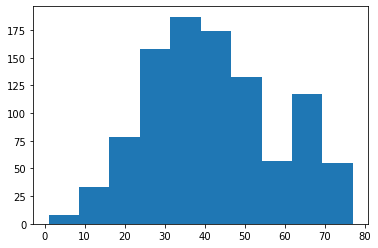

In [32]:
df3 = pd.read_csv('../data/ages_population3.csv')
plt.hist(df3['observation'])
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [33]:
print(average(df3['observation']))
print(np.std(df3['observation']))

41.989
16.13663158778808


In [34]:
"""
The distribution is somewhat skewed positively.
"""

'\nThe distribution is somewhat skewed positively.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [35]:
quartiles(df3['observation'])

[30.0, 40.0, 53.0]

In [36]:
"""
The difference between median and mean is small, and as expected the mean is slightly bigger than the median due to the light skewness.
"""

'\nThe difference between median and mean is small, and as expected the mean is slightly bigger than the median due to the light skewness.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [45]:
print(np.percentile(df1['observation'], 90))
print(np.percentile(df2['observation'], 90))
print(np.percentile(df3['observation'], 90))

53.0
31.0
67.0


*We can notice how the 90th percentile of df1, although the distribution is similar to the one of df3, is much lower than the latter. This mean that 90% of the population in df1 reaches, at max, a much lower age than the one in df3, and that's why the mean in df 3 is larger*

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

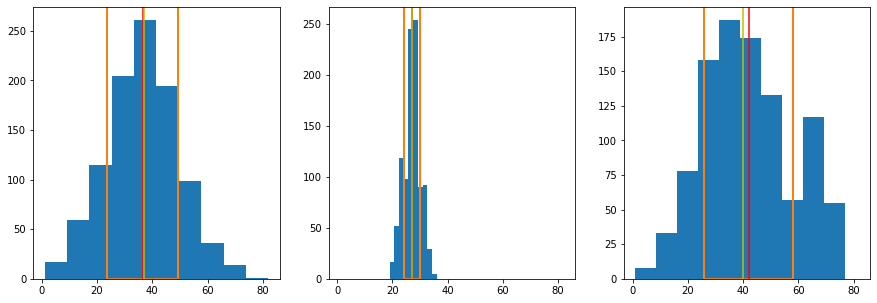

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15,5], sharex=True)
ax1.hist(df1['observation'])
ax1.axvline(average(df1['observation']), color='r')
ax1.axvline(median(df1['observation']), color='y')
ax1.errorbar(average(df1['observation']), 0, xerr=np.std(df1['observation']), capthick=2,capsize=275, ls='--')
ax2.hist(df2['observation'])
ax2.axvline(average(df2['observation']), color='r')
ax2.axvline(median(df2['observation']), color='y')
ax2.errorbar(average(df2['observation']), 0, xerr=np.std(df2['observation']), capthick=2,capsize=275)
ax3.hist(df3['observation'])
ax3.axvline(average(df3['observation']), color='r')
ax3.axvline(median(df3['observation']), color='y')
ax3.errorbar(average(df3['observation']), 0, xerr=np.std(df3['observation']), capthick=2,capsize=275)
plt.show()

*First of all, is important that all three distributions share the same x axis: in this way, we can better see the differences among them. In fact, we notice immediately the huge difference between graph 2 and the other two: it seems that, on average, the population in graph 2 is definitely younger than the population in graph 1 and 3. Also, another aspect that we can immediately notice looking at graph 1 and 3 is that the population in graph three has a bigger number of individuals with an age between 60 and 70 years old, that can suggest that in that neighborhood, older people have a higher life expectancy compared to those of graph 1.*